<h1>P2: Investigate a Dataset</h1>

For this project I have chosen the baseball dataset. The question that I will be working on is "How are baseball players with the highest salaries different from other players in terms of performance indicators?"

The approach that will be followed is a follows:
<ul>
<li>First, we will look at the salaries data independently and analyse over time.</li>
<li>Then we will define what constitutes "highest salaries".</li>
<li>Next we will explore one important batting, pitching and fielding performance indicator each and compare players with "highest salaries" to other players based on that.</li>
<li>Finally conclusions will be drawn based on these explorations</li>
</ul>

Based on the above approach the relevant tables to be used from the Sean Lahman database are Salaries table, Batting table, Pitching table and Fielding table.

To start with we will import the salaries table into a Pandas dataframe.

In [1]:
import pandas as pd
salaries_df = pd.read_csv("~/Desktop/Salaries.csv") #importing the csv file with salaries data into Pandas dataframe

In [2]:
print salaries_df.head() #checking out the data to verify successful import

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000


Now we will investigate the data to make sure that there are no problems with it before using the data.

In [3]:
print salaries_df.dtypes #checking the variable types in the table
print "\nThe total number of entries in the table is %s." %len(salaries_df['playerID'])
print "\nThe total number of unique players in the table is %s." %salaries_df['playerID'].nunique()
print "\nThe maximum and minimum salaries in the table are %s and %s respectively." %(salaries_df['salary'].max()
                                                                                      ,salaries_df['salary'].min())

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object

The total number of entries in the table is 24758.

The total number of unique players in the table is 4826.

The maximum and minimum salaries in the table are 33000000 and 0 respectively.


The data types in the dataframe are proper. The column on which we are going to perform mathematical operations is salary and it is already of 'int' data type. So there is no need to change data types in the table.

The total number of entries in the table and the total number of unique players in the table are different as expected since the data is for multiple years and there will be different entries for the same player for different yesrs.

The maximum salary is logical. But the minimum salary of 0 is surprising. Although it is entirely possible because of salary arbitration, we will need to check the number of such occurences. If the number of occurences with 0 salary are very high then this could point to faulty data.

In [4]:
print (salaries_df['salary'] == 0).sum() #counting number of times salary is 0

2


Since there are only two occurences of the salary being 0, we can assume that the data is without any error and go ahead with the analysis.

To start off, we will first compare the average salaries of players over years.

Populating the interactive namespace from numpy and matplotlib


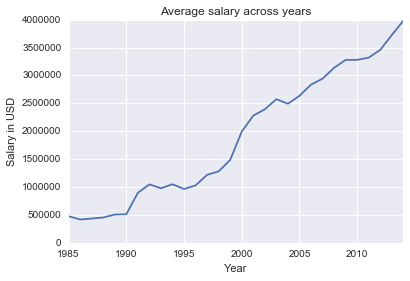

In [6]:
salaries_grouped_by_year = salaries_df.groupby('yearID') #grouping the table by year
mean_salaries_by_year = salaries_grouped_by_year['salary'].mean() #calculating the mean salary year-wise

import matplotlib.pyplot as plt
import seaborn as sns 
%pylab inline

ax = mean_salaries_by_year.plot(title = "Average salary across years") 
ax.set_ylabel("Salary in USD")
ax.set_xlabel("Year")

It can be seen from the above plot that the average salary has increased steadily from \$500000 in 1985 to \$4000000 in 2014. This can be attributed to the growing economy and the deacreasing value of money. For our analysis we can't directly use the salary to find the attributes of highest earning players. We would need to standardise the salary across each year to allow us to perform our analysis effectively. 

In [7]:
standard = lambda x: (x - x.mean()) / x.std(ddof=0) #lambda function to standardize

standardised_salaries = salaries_grouped_by_year.transform(standard) #standardizing salaries across years

salaries_df['salary'] = standardised_salaries #replacing salary in the original table by standardised salaries. This can be directly done as the indexes haven't changed.

salaries_df.rename(columns = {'salary':'salary_std'},inplace = True) #renaming salary column to salary_std to reflect standardised salaries

print salaries_df.head()



   yearID teamID lgID   playerID  salary_std
0    1985    ATL   NL  barkele01    1.147786
1    1985    ATL   NL  bedrost01    0.214865
2    1985    ATL   NL  benedbr01    0.200288
3    1985    ATL   NL   campri01    0.457812
4    1985    ATL   NL  ceronri01    0.433518


Now we will get to defining which player will fall under the category of player with highest salaries. Each player will have different values of standardised salary for different years. So to find out players with highest salaries over their careers we will have to find the average value of the standardised salaries for each player across the years they have played.

In [8]:
standardised_salaries_grouped_by_player = salaries_df.groupby('playerID') #grouping the standardised salary data by players
mean_standardised_salaries_by_player = standardised_salaries_grouped_by_player['salary_std'].mean() #taking mean across years for each player

print mean_standardised_salaries_by_player.head()

playerID
aardsda01   -0.440360
aasedo01     0.299539
abadan01    -0.664054
abadfe01    -0.647104
abbotje01   -0.644517
Name: salary_std, dtype: float64


Let us assume players having average standardised salary greater than 1 over their career to be players with the highest salaries for the purpose of this analysis.

In [9]:
print (mean_standardised_salaries_by_player >= 1).sum() #counting number of  players with average standardised salaries greater thean 1

231


231 out of a total of 4826 players have average standardised salaries greater than one over their careers which amounts to roughly 4.78%. Thus according to our assumption top 4.78% of the players according to average standardised salaries come into the category of the players with the highest salaries.

Now we will divide the players into two groups. Highest salary players and other players.

In [10]:
#converting pandas series to a pandas dataframe
mean_std_salaries_by_players_df = pd.DataFrame({'playerID':mean_standardised_salaries_by_player.index,'salary_std':mean_standardised_salaries_by_player.values})
print mean_std_salaries_by_players_df.head()

    playerID  salary_std
0  aardsda01   -0.440360
1   aasedo01    0.299539
2   abadan01   -0.664054
3   abadfe01   -0.647104
4  abbotje01   -0.644517


In [11]:
#indexes of players with salary_std greater than one
index_greater = mean_std_salaries_by_players_df[mean_std_salaries_by_players_df['salary_std'] >= 1].index.tolist()

#indexes of players with salary_std less than one
index_less = mean_std_salaries_by_players_df[mean_std_salaries_by_players_df['salary_std'] < 1].index.tolist()

In [12]:
#making the list of players with the highest salaries
highest_salaries_players = mean_std_salaries_by_players_df.loc[index_greater]
highest_salaries_players = highest_salaries_players.reset_index(drop = True) # resetting index
print highest_salaries_players.head()

#making list of other players
other_players = mean_std_salaries_by_players_df.loc[index_less]
other_players = other_players.reset_index(drop = True) #resetting index
print "\n"
print other_players.head()



    playerID  salary_std
0  abreubo01    1.317249
1  alomaro01    1.746711
2   aloumo01    1.011307
3  andujjo01    1.453056
4  appieke01    1.273718


    playerID  salary_std
0  aardsda01   -0.440360
1   aasedo01    0.299539
2   abadan01   -0.664054
3   abadfe01   -0.647104
4  abbotje01   -0.644517


Now that we have divided the players into two categories, the next step is to look at the batting, pitching and fielding performance indicators to be compared. We will select one performance indicator each for batting, pitching and fielding to analyze and draw conclusions on.

The steps involved in this will be as follows
<ul>
<li>Importing the table in to a pandas dataframe.
<li>Decide the performance indicator to be analyzed.
<li>Checking the datapoints that will be needed to calculate the selected performance indicator for consistency.
<li>Calculating the required performance indicator.
<li>Importing the final value of the performance indicator into the three salary tables i.e highest_salaries_players,other_players and mean_standardised_salaries_by_player.
</ul>

We will start with the batting performance indicator. The first step is to import the batting table into a pandas dataframe.

In [13]:
import pandas as pd
batting_df = pd.read_csv("~/Desktop/Batting.csv") #importing the csv file with batting data into Pandas dataframe

In [14]:
print batting_df.tail() #checking out the data to verify

        playerID  yearID  stint teamID lgID    G   AB   R    H  2B  ...   RBI  \
99841  zieglbr01    2014      1    ARI   NL   68    1   0    0   0  ...     0   
99842  zimmejo02    2014      1    WAS   NL   32   55   3   10   1  ...     1   
99843  zimmery01    2014      1    WAS   NL   61  214  26   60  19  ...    38   
99844  zobribe01    2014      1    TBA   AL  146  570  83  155  34  ...    52   
99845  zuninmi01    2014      1    SEA   AL  131  438  51   87  20  ...    60   

       SB  CS  BB   SO  IBB  HBP  SH  SF  GIDP  
99841   0   0   0    1    0    0   0   0     0  
99842   0   0   2   21    0    0   9   1     0  
99843   0   0  22   37    0    0   0   4     6  
99844  10   5  75   84    4    1   2   6     8  
99845   0   3  17  158    1   17   0   4    12  

[5 rows x 22 columns]


For batting the performance indicator that we will be looking at is the slugging percentage which is defined as the total bases divided by at bats. This performance indicator is not directly available in the batting table so we will have to calculate it using given data. Also the data available in the batting table is yearly. To find the career slugging percentage we will have to add the yearly data of each player.

First we will look at the sanctity of the data that we are going to use.

In [15]:
batting_df['AB'].describe()

count    94697.000000
mean       150.576132
std        186.671586
min          0.000000
25%          7.000000
50%         58.000000
75%        252.000000
max        716.000000
Name: AB, dtype: float64

In [16]:
batting_df['H'].describe()

count    94697.000000
mean        39.433108
std         53.379504
min          0.000000
25%          1.000000
50%         11.000000
75%         64.000000
max        262.000000
Name: H, dtype: float64

In [17]:
batting_df['2B'].describe()

count    94697.000000
mean         6.654181
std          9.804776
min          0.000000
25%          0.000000
50%          2.000000
75%         10.000000
max         67.000000
Name: 2B, dtype: float64

In [18]:
batting_df['3B'].describe()

count    94697.000000
mean         1.384996
std          2.723249
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         36.000000
Name: 3B, dtype: float64

In [19]:
batting_df['HR'].describe()

count    94697.000000
mean         2.943747
std          6.402116
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         73.000000
Name: HR, dtype: float64

The statistics for all the data points that are going to be used are as expected. There is nothing out of ordinary abobut them. So we can assume that the required data in the batting table is proper and there is no need of data cleaning.

We will move on to calculating the slugging percentage now.

In [20]:
batting_grouped_by_player = batting_df.groupby('playerID') #grouping data by players

In [21]:
#finding overall values of required data points
overall_hits = batting_grouped_by_player['H'].sum() 
overall_doubles = batting_grouped_by_player['2B'].sum()
overall_triples = batting_grouped_by_player['3B'].sum()
overall_homeruns = batting_grouped_by_player['HR'].sum()
overall_atbats = batting_grouped_by_player['AB'].sum()

#calculating slugging percentage
slugging_percentage = (overall_hits+(2*overall_doubles)+(3*overall_triples)+(4*overall_homeruns))/overall_atbats

print slugging_percentage.head()

playerID
aardsda01    0.000000
aaronha01    0.673973
aaronto01    0.391949
aasedo01     0.000000
abadan01     0.095238
dtype: float64


In [22]:
#converting pandas series to a pandas dataframe
slugging_percentage_df = pd.DataFrame({'playerID':slugging_percentage.index,'slugging_percentage':slugging_percentage.values})
print slugging_percentage_df.head()

    playerID  slugging_percentage
0  aardsda01             0.000000
1  aaronha01             0.673973
2  aaronto01             0.391949
3   aasedo01             0.000000
4   abadan01             0.095238


There can be some players for whom the number of at bats is 0. For these players the value of slugging percentage will be NaN since we will be dividing by 0. 

Now we will add the slugging percentage data to the tables containing salaries data i.e. the highest salaries table, other players table and the table containing salary data for all players.

In [23]:
#writing a function for this operation since this is going to be used again during pitching and fielding performance indicator

def merge_with_salary_tables(performance_indicator):
    merged_salary_table = mean_std_salaries_by_players_df.merge(performance_indicator,on='playerID',how='inner')
    merged_highest_salary_table = highest_salaries_players.merge(performance_indicator,on='playerID',how='inner')
    merged_other_players = other_players.merge(performance_indicator,on='playerID',how='inner')
    
    return (merged_salary_table,merged_highest_salary_table,merged_other_players)

mean_std_salaries_by_players_df,highest_salaries_players,other_players = merge_with_salary_tables(slugging_percentage_df)

#printing results to confirm if the function is working as desired
print mean_std_salaries_by_players_df.head()
print "\n"
print highest_salaries_players.head()
print "\n"
print other_players.head()

    playerID  salary_std  slugging_percentage
0  aardsda01   -0.440360             0.000000
1   aasedo01    0.299539             0.000000
2   abadan01   -0.664054             0.095238
3   abadfe01   -0.647104             0.125000
4  abbotje01   -0.644517             0.505034


    playerID  salary_std  slugging_percentage
0  abreubo01    1.317249             0.583373
1  alomaro01    1.746711             0.530365
2   aloumo01    1.011307             0.628251
3  andujjo01    1.453056             0.209226
4  appieke01    1.273718             0.096386


    playerID  salary_std  slugging_percentage
0  aardsda01   -0.440360             0.000000
1   aasedo01    0.299539             0.000000
2   abadan01   -0.664054             0.095238
3   abadfe01   -0.647104             0.125000
4  abbotje01   -0.644517             0.505034


It can be seen that the function worked correctly. 

Now we will move on to the pitching performance indicator.

In [24]:
import pandas as pd
pitching_df = pd.read_csv("~/Desktop/Pitching.csv") #importing the csv file with batting data into Pandas dataframe

In [25]:
print pitching_df.tail()

        playerID  yearID  stint teamID lgID   W  L   G  GS  CG  ...   IBB  WP  \
43325  yateski01    2014      1    TBA   AL   0  2  37   0   0  ...     3   2   
43326  youngch03    2014      1    SEA   AL  12  9  30  29   0  ...     3   5   
43327   zeidjo01    2014      1    HOU   AL   0  0  23   0   0  ...     1   1   
43328  zieglbr01    2014      1    ARI   NL   5  3  68   0   0  ...     6   0   
43329  zimmejo02    2014      1    WAS   NL  14  5  32  32   3  ...     0   4   

       HBP  BK  BFP  GF   R  SH  SF  GIDP  
43325    3   0  156  12  16   0   1     2  
43326    3   1  688   0  70   4   9     6  
43327    1   0   98   6  18   1   2     1  
43328    3   0  281  11  29   2   4     9  
43329    6   0  800   0  67   5   3    11  

[5 rows x 30 columns]


For pitching, the performance indicator that we will be looking at is ERA or the earned runs average. ERA is the mean of earned runs given up by a pitcher per nine innings pitched. The values of ERA is already available in the table for each year. But we need to find the average value of ERA over the career for each player. To do that we would need to multiply ERA by games played, sum it across year and divide by the total number of games played over career.

First we will look at the sanctity of the data we are going to use.

In [26]:
pitching_df['GS'].describe()

count    43330.000000
mean         9.618786
std         12.340553
min          0.000000
25%          0.000000
50%          3.000000
75%         18.000000
max         75.000000
Name: GS, dtype: float64

In [27]:
pitching_df['ERA'].describe()

count    43241.000000
mean         5.073577
std          5.335081
min          0.000000
25%          3.150000
50%          4.130000
75%          5.500000
max        189.000000
Name: ERA, dtype: float64

The statistics for all the data points that are going to be used are as expected except the maximum value of ERA. 

We will now check out that value.

In [28]:
print pitching_df.loc[pitching_df['ERA'].argmax()] #getting the entry for the player with the maximum ERA

playerID    scheija01
yearID           1894
stint               1
teamID            PHI
lgID               NL
W                   0
L                   1
G                   1
GS                  1
CG                  0
SHO                 0
SV                  0
IPouts              1
H                   6
ER                  7
HR                  0
BB                  2
SO                  0
BAOpp            0.86
ERA               189
IBB               NaN
WP                  0
HBP                 0
BK                  0
BFP                 0
GF                  0
R                  10
SH                NaN
SF                NaN
GIDP              NaN
Name: 2014, dtype: object


Since this player played only one match in the 1894 season, the high value of ERA is not out of ordinary. And since our salary data only starts from 1985, this entry is anyways not going to be part of our analysis. So we can assume that our pitching data is correct and no data cleaning is required. 

We can go ahead with the calculating the career ERA now.

In [29]:
#calculating ERA * Games Gtarted which is required to calculate career ERA
pitching_df['ERA*GS'] = pitching_df['ERA']*pitching_df['GS'] 

In [30]:
pitching_grouped_by_player = pitching_df.groupby('playerID') #grouping data by players

In [31]:
ERA = pitching_grouped_by_player['ERA*GS'].sum()/pitching_grouped_by_player['GS'].sum() #calculating career ERA
print ERA.head()

playerID
aardsda01         NaN
aasedo01     4.146923
abadfe01     5.090000
abbeybe01    4.511061
abbeych01         NaN
dtype: float64


The NaN values appearing in the code are normal. This is because the games started by some players could be 0 over their career. 

In [32]:
#converting pandas series to a pandas dataframe
ERA_df = pd.DataFrame({'playerID':ERA.index,'ERA':ERA.values})
print ERA_df.head()

        ERA   playerID
0       NaN  aardsda01
1  4.146923   aasedo01
2  5.090000   abadfe01
3  4.511061  abbeybe01
4       NaN  abbeych01


In [33]:
#Using the earlier creates function to merge the ERA data with the three salary tables
mean_std_salaries_by_players_df,highest_salaries_players,other_players = merge_with_salary_tables(ERA_df)

In [34]:
#printing results to confirm if the function worked as desired
print mean_std_salaries_by_players_df.head()
print "\n"
print highest_salaries_players.head()
print "\n"
print other_players.head()

    playerID  salary_std  slugging_percentage       ERA
0  aardsda01   -0.440360             0.000000       NaN
1   aasedo01    0.299539             0.000000  4.146923
2   abadfe01   -0.647104             0.125000  5.090000
3  abbotji01    0.273227             0.095238  4.329331
4  abbotky01   -0.664120             0.161290  5.055000


    playerID  salary_std  slugging_percentage       ERA
0  andujjo01    1.453056             0.209226  3.625279
1  appieke01    1.273718             0.096386  3.863383
2  beckejo02    1.309534             0.266436  3.891205
3  blylebe01    1.198305             0.161863  3.378117
4  boddimi01    1.208597                  NaN  3.816440


    playerID  salary_std  slugging_percentage       ERA
0  aardsda01   -0.440360             0.000000       NaN
1   aasedo01    0.299539             0.000000  4.146923
2   abadfe01   -0.647104             0.125000  5.090000
3  abbotji01    0.273227             0.095238  4.329331
4  abbotky01   -0.664120             0.16129

Now we will move on to the fielding performance indicator.

In [35]:
import pandas as pd
fielding_df = pd.read_csv("~/Desktop/Fielding.csv") #importing the csv file with batting data into Pandas dataframe

In [36]:
print fielding_df.head()

    playerID  yearID  stint teamID lgID POS   G  GS  InnOuts  PO   A   E  DP  \
0  abercda01    1871      1    TRO  NaN  SS   1 NaN      NaN   1   3   2   0   
1   addybo01    1871      1    RC1  NaN  2B  22 NaN      NaN  67  72  42   5   
2   addybo01    1871      1    RC1  NaN  SS   3 NaN      NaN   8  14   7   0   
3  allisar01    1871      1    CL1  NaN  2B   2 NaN      NaN   1   4   0   0   
4  allisar01    1871      1    CL1  NaN  OF  29 NaN      NaN  51   3   7   1   

   PB  WP  SB  CS  ZR  
0 NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN  
3 NaN NaN NaN NaN NaN  
4 NaN NaN NaN NaN NaN  


We will go ahead with the fielding percentage as the performance indicator for fielding. Fielding percentage is defined as the sum of assists and putouts divided by the number of total chances (putouts + assists + errors). To find the career fielding percentage we will have to take the sum of individual data points across years played.

First we will look at the sanctity of the data points to be used.

In [37]:
fielding_df['PO'].describe()

count    154477.000000
mean         79.614344
std         176.567740
min           0.000000
25%           2.000000
50%          10.000000
75%          72.000000
max        1846.000000
Name: PO, dtype: float64

In [38]:
fielding_df['A'].describe()

count    154476.000000
mean         30.896126
std          75.108578
min           0.000000
25%           1.000000
50%           5.000000
75%          22.000000
max         641.000000
Name: A, dtype: float64

In [39]:
fielding_df['E'].describe()

count    154475.000000
mean          3.537712
std           7.570629
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         119.000000
Name: E, dtype: float64

The statistics for all the data points that are going to be used are as expected. There is nothing out of ordinary abobut them. So we can assume that the required data in the fielding table is proper and there is no need of data cleaning.

We will move on to calculating the fielding percentage now.

In [40]:
fielding_grouped_by_player = fielding_df.groupby('playerID') #grouping data by players

In [41]:
#finding overall values of required parameters
overall_putouts = fielding_grouped_by_player['PO'].sum() 
overall_assists = fielding_grouped_by_player['A'].sum()
overall_errors = fielding_grouped_by_player['E'].sum()

#calculating fielding percentage
fielding_percentage = (overall_putouts + overall_assists)/(overall_putouts + overall_assists + overall_errors)
print fielding_percentage.tail()

playerID
zupcibo01    0.976699
zupofr01     0.941176
zuvelpa01    0.967376
zuverge01    0.964467
zwilldu01    0.969400
dtype: float64


In [42]:
#converting pandas series to a pandas dataframe
fielding_percentage_df = pd.DataFrame({'playerID':fielding_percentage.index,'fielding_percentage':fielding_percentage.values})
print fielding_percentage_df.head()

   fielding_percentage   playerID
0             0.951220  aardsda01
1             0.981275  aaronha01
2             0.980523  aaronto01
3             0.939535   aasedo01
4             0.974359   abadan01


In [43]:
#Using the earlier creates function to merge the fielding percentage data with the three salary tables
mean_std_salaries_by_players_df,highest_salaries_players,other_players = merge_with_salary_tables(fielding_percentage_df)

In [44]:
#printing results to confirm if the function worked as desired
print mean_std_salaries_by_players_df.head()
print "\n"
print highest_salaries_players.head()
print "\n"
print other_players.head()

    playerID  salary_std  slugging_percentage       ERA  fielding_percentage
0  aardsda01   -0.440360             0.000000       NaN             0.951220
1   aasedo01    0.299539             0.000000  4.146923             0.939535
2   abadfe01   -0.647104             0.125000  5.090000             0.933333
3  abbotji01    0.273227             0.095238  4.329331             0.976378
4  abbotky01   -0.664120             0.161290  5.055000             0.968750


    playerID  salary_std  slugging_percentage       ERA  fielding_percentage
0  andujjo01    1.453056             0.209226  3.625279             0.914692
1  appieke01    1.273718             0.096386  3.863383             0.972665
2  beckejo02    1.309534             0.266436  3.891205             0.948925
3  blylebe01    1.198305             0.161863  3.378117             0.969356
4  boddimi01    1.208597                  NaN  3.816440             0.950233


    playerID  salary_std  slugging_percentage       ERA  fielding_percen

Now we have our data cleaned and combined in one table. We can easily perform analysis on this data and draw conclusions. 

The steps that will be followed are as follows:

<ul>
<li>First we will do a primary analysis of the performance indicator which will involve making a scatter plot of performance indicator vs standardised salary and comparing mean value of performance indicator for all players, highest salary players and other players.
<li>Based on the primary analysis we will draw inferences on the characteristics of the highest paid players with respect to the performance indicator in question.
<li>Then we will use hypothesis testing to draw rigorous conclusions about the performance indicator.
</ul>

This exercise will be repeated for all three performance indicators.

In [47]:
#defining a function to conduct primary analysis as above
def primary_analysis(performance_indicator):
    plt.title("Scatter plot of %s vs Standardised Salary" %performance_indicator)
    plt.xlabel("Standardised Salary")
    plt.ylabel(performance_indicator)
    plt.scatter(mean_std_salaries_by_players_df['salary_std'],mean_std_salaries_by_players_df[performance_indicator],marker = '.',s=5)
    print "The mean %s of all players is %s" %(performance_indicator,mean_std_salaries_by_players_df[performance_indicator].mean())
    print "The mean %s of highest salary players is %s" %(performance_indicator,highest_salaries_players[performance_indicator].mean())
    print "The mean %s of other players is %s" %(performance_indicator,other_players[performance_indicator].mean())

The mean slugging_percentage of all players is 0.181954246078
The mean slugging_percentage of highest salary players is 0.241782889717
The mean slugging_percentage of other players is 0.179398751249


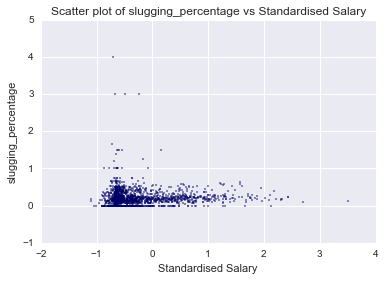

In [48]:
#primary analysis of slugging percentage
primary_analysis('slugging_percentage') 

From the above data we can observe that the mean of slugging percentage is higher for players with highest salary as compared to that of other players. Even the scatter plot is dense around lower values of slugging percentage for other players (i.e. standardised salary < 1) as compared to highest salary players. We can infer from the above data that the players with the highest salaries will have higher slugging percentage. But we need to perform a hypothesis test to draw a rigorous conclusion.

In the hypothesis test we will be comparing mean value of slugging percentage for highest salary players and other players. Our null hypothesis would be that the mean value of slugging percentage for highest salary players is the same as the mean value of slugging percentage of the population of players. Our alternative hypothesis is that these mean values are different from each other. We will be applying the z-test to test the hypothesis since the sample size is greater than 30 and we know the population standard deviation.

In [49]:
import scipy.stats as st

def hypothesis_test(performance_indicator):
    print "Null Hypothesis: Mean %s of all players = Mean %s of highest salary players" %(performance_indicator,performance_indicator)
    print "Alternative Hypothesis: Mean %s of all players != Mean %s of highest salary players" %(performance_indicator,performance_indicator)
    
    #calculating z-critical values
    z_critical_lower = st.norm.ppf(.025) 
    z_critical_upper = st.norm.ppf(.975)
    print "\nThe z-critical values for an alpha level of 0.05 for a two-tailed z-test are %s and %s." %(z_critical_lower,z_critical_upper)
    
    #calculating test statistic
    z_value = (highest_salaries_players[performance_indicator].mean() - mean_std_salaries_by_players_df[performance_indicator].mean())/mean_std_salaries_by_players_df[performance_indicator].std(ddof=0)
    print "\nThe value of the test statistic is %s." %z_value
    
    if ((z_value > z_critical_upper) | (z_value < z_critical_lower)):
        print "\nSince the test statistic lies outside the z-critical values of alpha level 0.05, we reject the null hypothesis."
    else:
        print "\nSince the test statistic lies inside the z-critical values of alpha level 0.05, we fail to reject the null hypothesis"

    

In [50]:
hypothesis_test('slugging_percentage')

Null Hypothesis: Mean slugging_percentage of all players = Mean slugging_percentage of highest salary players
Alternative Hypothesis: Mean slugging_percentage of all players != Mean slugging_percentage of highest salary players

The z-critical values for an alpha level of 0.05 for a two-tailed z-test are -1.95996398454 and 1.95996398454.

The value of the test statistic is 0.257736546308.

Since the test statistic lies inside the z-critical values of alpha level 0.05, we fail to reject the null hypothesis


Looking at the primary analysis, we believed that the mean slugging percentage is higher for highest salary players. But after performing the hypothesis test, we cannot say that the mean slugging percentage is statistically higher for highest salary players since we failed to reject the null hypothesis.

Now we will move on to the pitching performance indicator ERA.

The mean ERA of all players is 4.97017025624
The mean ERA of highest salary players is 3.71990486946
The mean ERA of other players is 5.03134532104


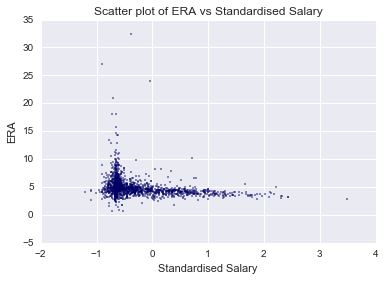

In [51]:
primary_analysis('ERA') 

From the above data we can observe that the mean of ERA is lower for players with highest salary as compared to that of other players. Even the scatter plot is dense around higher values of ERA for other players (i.e. standardised salary < 1) as compared to highest salary players. We can infer from the above data that the players with the highest salaries will have lower values of ERA. But we need to perform a hypothesis test to draw a rigorous conclusion.

We can use the earlier defined function to perform the hypothesis test since the conditions are the same for ERA.

In [52]:
hypothesis_test('ERA')

Null Hypothesis: Mean ERA of all players = Mean ERA of highest salary players
Alternative Hypothesis: Mean ERA of all players != Mean ERA of highest salary players

The z-critical values for an alpha level of 0.05 for a two-tailed z-test are -1.95996398454 and 1.95996398454.

The value of the test statistic is -0.684366138808.

Since the test statistic lies inside the z-critical values of alpha level 0.05, we fail to reject the null hypothesis


Again we fail to reject the null hypothesis. So statistically speaking we cannot say that the ERA is significantly lower for players with the highest salaries.

We will now move on the fielding performance indicator i.e. fielding_percentage.

The mean fielding_percentage of all players is 0.951262775757
The mean fielding_percentage of highest salary players is 0.957784021141
The mean fielding_percentage of other players is 0.951019893971


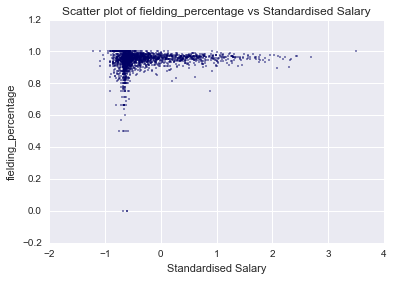

In [53]:
primary_analysis('fielding_percentage') 

Looking at the above data it seems that the fielding percentage is approximately the same for the highest salary players as compared to other players. We will perform a hypothesis test to check the same. We can use the earlier function since the conditions remain the same.

In [54]:
hypothesis_test('fielding_percentage')

Null Hypothesis: Mean fielding_percentage of all players = Mean fielding_percentage of highest salary players
Alternative Hypothesis: Mean fielding_percentage of all players != Mean fielding_percentage of highest salary players

The z-critical values for an alpha level of 0.05 for a two-tailed z-test are -1.95996398454 and 1.95996398454.

The value of the test statistic is 0.105757134624.

Since the test statistic lies inside the z-critical values of alpha level 0.05, we fail to reject the null hypothesis


As expected we have failed to reject the null hypothesis. So the fielding percentage of the highest salary players is not different from the fielding percentage of all the players statistically

<h2>Conclusion</h2>

The question posed for this analysis was "How are baseball players with the highest salaries different from other players in terms of performance indicators?"

We first analyzed the salary data to define what constitutes "highest salary players". Then we divided the players in to highest salary players group and other players group. Next we selected one performance indicator each for batting, pitching and fielding to be analyzed. We then performed a primary analysis to make inferences about each of these performance indicators and followed it up with hypothesis testing to draw rigorous conclusions.

We had selected slugging percentage as the batting performance indicator, ERA as the pitching performance indicator and fielding percentage as the fielding performance indicator. For all three indicators we came to a conclusion that the difference between mean value of those indicators for the highest salary players and that of all players is not statistically different despite the fact that we believed mean of slugging percentage and ERA to be different after primary analysis.

Thus in terms of our chosen three performance indicators, on an average the players with the highest salaries are no different from other players.

<h2>References</h2>

<ul>
<li>http://seanlahman.com/files/database/readme2014.txt
<li>https://en.wikipedia.org/wiki/Slugging_percentage
<li>http://www.cbssports.com/mlb/eye-on-baseball/21056639/what-is-the-best-pitching-stat
<li>http://www.cbssports.com/mlb/eye-on-baseball/21011936/what-is-the-best-offensive-stat-
<li>http://www.cbssports.com/mlb/eye-on-baseball/21070004/what-is-the-best-defensive-stat-
<li>https://en.wikipedia.org/wiki/Earned_run_average#All-time_career_leaders
<li>https://en.wikipedia.org/wiki/Fielding_percentage
<li>http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/
<li>http://www.ibtimes.com/sportsnet/salary-arbitration-what-it-how-it-works-major-league-baseball-705189
</ul>